# Looking Into Details

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import tensorflow_datasets as tfds

In [3]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [4]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']
# Data is splitted into 25000 for training and 25000 for testing
# These have string and labels

In [5]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [6]:
print(type(train_data))
print(type(training_sentences))
print(type(training_labels))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<class 'list'>
<class 'list'>


In [7]:
training_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [8]:
training_labels[0]
# 0 means negative
# and 1 positive

0

In [9]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [10]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOv>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [12]:
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# def decode_reviews(text):
#     return " ".join([reverse_word_index.get(i, '?') for i in text])
# print(decode_reviews(padded[1]))
# print(training_sentences[1])

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Embedding is the key to text sentiment analysis in TensorFlow
    tf.keras.layers.Flatten(),
#     tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 15
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/15
782/782 [==============================] - 4s 5ms/step - loss: 0.4973 - accuracy: 0.7392 - val_loss: 0.3510 - val_accuracy: 0.8476
Epoch 2/15
782/782 [==============================] - 3s 4ms/step - loss: 0.2413 - accuracy: 0.9047 - val_loss: 0.3794 - val_accuracy: 0.8314
Epoch 3/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0929 - accuracy: 0.9760 - val_loss: 0.4684 - val_accuracy: 0.8200
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0232 - accuracy: 0.9970 - val_loss: 0.5330 - val_accuracy: 0.8227
Epoch 5/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.5934 - val_accuracy: 0.8247
Epoch 6/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6424 - val_accuracy: 0.8268
Epoch 7/15
782/782 [==============================] - 3s 4ms/step - loss: 8.9507e-04 - accuracy: 1.0000 - val_loss: 0.6844 - val_accuracy: 0.8263
Ep

In [16]:
# Visuallization of Embedded
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 
# shape: (vocab_size, embedding_dim)

(10000, 16)


In [17]:
# To plat it we need helper function to reverse our word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [18]:
reverse_word_index

{1: '<OOv>',
 2: 'the',
 3: 'and',
 4: 'a',
 5: 'of',
 6: 'to',
 7: 'is',
 8: 'br',
 9: 'in',
 10: 'it',
 11: 'i',
 12: 'this',
 13: 'that',
 14: 'was',
 15: 'as',
 16: 'for',
 17: 'with',
 18: 'movie',
 19: 'but',
 20: 'film',
 21: "'s",
 22: 'on',
 23: 'you',
 24: 'not',
 25: 'are',
 26: 'his',
 27: 'he',
 28: 'have',
 29: 'be',
 30: 'one',
 31: 'all',
 32: 'at',
 33: 'by',
 34: 'they',
 35: 'an',
 36: 'who',
 37: 'so',
 38: 'from',
 39: 'like',
 40: 'her',
 41: "'t",
 42: 'or',
 43: 'just',
 44: 'there',
 45: 'about',
 46: 'out',
 47: "'",
 48: 'has',
 49: 'if',
 50: 'some',
 51: 'what',
 52: 'good',
 53: 'more',
 54: 'very',
 55: 'when',
 56: 'she',
 57: 'up',
 58: 'can',
 59: 'b',
 60: 'time',
 61: 'no',
 62: 'even',
 63: 'my',
 64: 'would',
 65: 'which',
 66: 'story',
 67: 'only',
 68: 'really',
 69: 'see',
 70: 'their',
 71: 'had',
 72: 'were',
 73: 'me',
 74: 'well',
 75: 'we',
 76: 'than',
 77: 'much',
 78: 'been',
 79: 'get',
 80: 'bad',
 81: 'will',
 82: 'people',
 83: 'do',

In [19]:
# To write the vectors and their metadata auto files
# The tensorflow projector reads this file type and uses it to plot the vectorsin 3D space
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for words_num in range(1, vocab_size):
    word = reverse_word_index[words_num]
    embedding = weights[words_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embedding]) + "\n")
out_v.close()
out_m.close()

In [20]:
# We'll get two files
# meta.tsv and vecs.tsv
# Then go to the "projector.tensorflow.org" and load the data

# Sarcasm Dataset

In [102]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [103]:
# Hyper Parameters
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [104]:
with open("Sarcasm_Headlines_Dataset.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item["is_sarcastic"])

# Building a classifier for Sarcam Dataset

In [105]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [106]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [107]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [108]:
# Creating our NN
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [109]:
# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [111]:
# Fit
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))
# history = model.fit(training_padded, training_labels, epochs=num_epochs, 
#                     validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 2s 4ms/step - loss: 0.6728 - accuracy: 0.5784 - val_loss: 0.6233 - val_accuracy: 0.6663
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.8149 - val_loss: 0.3987 - val_accuracy: 0.8380
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3271 - accuracy: 0.8712 - val_loss: 0.3577 - val_accuracy: 0.8524
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2743 - accuracy: 0.8927 - val_loss: 0.3467 - val_accuracy: 0.8577
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2371 - accuracy: 0.9076 - val_loss: 0.3412 - val_accuracy: 0.8551
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2107 - accuracy: 0.9183 - val_loss: 0.3469 - val_accuracy: 0.8529
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.1885 - accuracy: 0.9291 - val_loss: 0.3524 - val_accuracy: 0.8539
Epoch 

In [112]:
import matplotlib.pyplot as plt

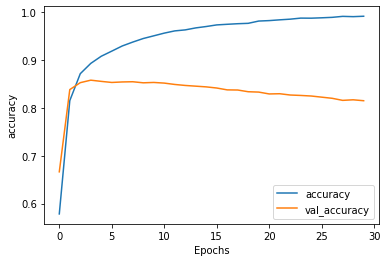

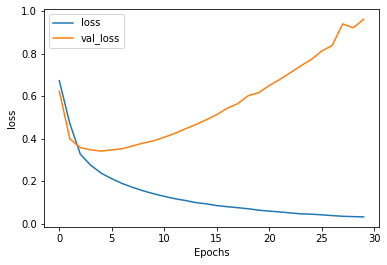

In [113]:
def plot_graphs(history, string):    
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [37]:
# Loss function
# We can change the hyper parameters to see changes and to decrease the loss and increse the accuracy
# We have to find parameters for which training accuracy wil be 90+ and without sharply increase in loss

In [114]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [115]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [116]:
import io

out_v = io.open('vector.tsv', 'w', encoding='utf-8')
out_m = io.open('metaa.tsv', 'w', encoding='utf-8')
for words_num in range(1, vocab_size):
    word = reverse_word_index[words_num]
    embedding = weights[words_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embedding]) + "\n")
out_v.close()
out_m.close()

# Diving Into the code
# Usind imdb_reviews/subworks8k

In [198]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [199]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [200]:
train_data, test_data = imdb['train'], imdb['test']

In [201]:
tokenizer = info.features['text'].encoder
# To access the sub words tokenizer

In [202]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [203]:
# If we want to see how it encodes or decodes strings
# Example
sample_string = 'TensorFlow, form basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 1642, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, form basics to mastery


In [204]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [205]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [206]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_15  (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Compile
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 19s 48ms/step - loss: 0.6851 - accuracy: 0.5785 - val_loss: 0.6506 - val_accuracy: 0.7316
Epoch 2/10
391/391 [==============================] - 19s 47ms/step - loss: 0.5475 - accuracy: 0.7869 - val_loss: 0.4672 - val_accuracy: 0.8136
Epoch 3/10
391/391 [==============================] - 16s 42ms/step - loss: 0.3858 - accuracy: 0.8651 - val_loss: 0.3704 - val_accuracy: 0.8638
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 0.3085 - accuracy: 0.8908 - val_loss: 0.3337 - val_accuracy: 0.8722
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2678 - accuracy: 0.9060 - val_loss: 0.3204 - val_accuracy: 0.8734
Epoch 6/10
391/391 [==============================] - 16s 42ms/step - loss: 0.2423 - accuracy: 0.9142 - val_loss: 0.3184 - val_accuracy: 0.8716
Epoch 7/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2212 - accuracy: 0.9216 - val_loss: 0.3075 - val_accuracy:

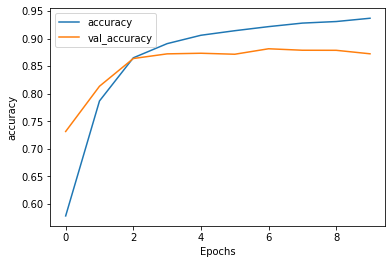

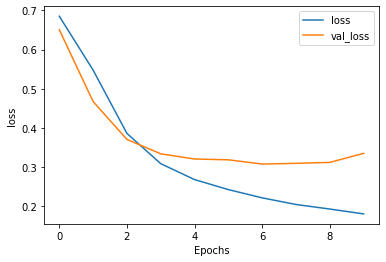

In [209]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [213]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vectorsub.tsv', 'w', encoding='utf-8')
out_m = io.open('metasub.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)
